<a href="https://colab.research.google.com/github/Himatora/project_analitics/blob/master/%D0%A7%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import pandas as pd

Считываем данные

In [23]:
students = pd.read_csv('/content/export studs (1).csv', sep=';',
                      encoding='windows-1251')

In [29]:
attendance = pd.read_csv('/content/sup_public_sup_mark (1).csv', sep=',',
                      encoding='windows-1251')

In [30]:
print("Данные до очистки:")
print(f"Размерность: {attendance.shape}")
print(f"Общее количество пропусков: {attendance.isnull().sum().sum()}")

Данные до очистки:
Размерность: (1635186, 9)
Общее количество пропусков: 2909329


In [24]:
print("Данные до очистки:")
print(f"Размерность: {students.shape}")
print(f"Общее количество пропусков: {students.isnull().sum().sum()}")

Данные до очистки:
Размерность: (465638, 12)
Общее количество пропусков: 2


In [27]:
print(f"Исходный размер данных: {students.shape}")

# Проверяем количество пропусков
missing_count = students.isnull().sum().sum()

if missing_count > 0:
    rows_with_missing = students[students.isnull().any(axis=1)]
    print(f"Строки с пропусками: {len(rows_with_missing)}")
    print(rows_with_missing)

# Удаляем строки с пропусками
students_clean = students.dropna()

print(f"Размер данных после удаления строк с пропусками: {students_clean.shape}")
print(f"Пропусков осталось: {students_clean.isnull().sum().sum()}")

Строки с пропусками: 1
                                   Faculty  Faculty_ID  \
164730  Институт заочно-вечернего обучения          15   

                                  Speciality  Speciality_ID    Group  \
164730  Автомобили и автомобильное хозяйство            629  ААбз-23   

        Student_ID    Birthday  Is_Academic  Discipline_ID  \
164730     2456219  19.08.1998            0          11272   

                                      Discipline  Result_ID Result  
164730  Введение в профессиональную деятельность        NaN    NaN  
Размер данных после удаления строк с пропусками: (465637, 12)
Пропусков осталось: 0


Обработка данных

In [31]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id,work_id,advertisement_items_ids
0,501,551,1.0,2438882,2024-03-19 05:18:26.965851 +00:00,2024-03-19 05:18:26.965905 +00:00,NaN,NaN,NaN
1,506,551,1.0,2433670,2024-03-19 05:18:58.924558 +00:00,2024-03-19 05:18:58.924627 +00:00,NaN,NaN,NaN
2,99,42,1.0,2443930,2024-03-12 06:19:27.320665 +00:00,2024-03-12 06:19:27.320716 +00:00,NaN,NaN,NaN
3,511,551,NaN,2432303,2024-03-19 05:19:17.082448 +00:00,2024-03-19 05:19:17.551402 +00:00,NaN,NaN,NaN
4,516,551,1.0,2434755,2024-03-19 05:19:40.948376 +00:00,2024-03-19 05:19:40.948425 +00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1635181,1637359,200547,1.0,2479662,2025-10-17 01:26:50.819799 +00:00,2025-10-17 01:26:50.819820 +00:00,7329.0,NaN,NaN
1635182,1637360,200547,1.0,2486597,2025-10-17 01:26:57.444616 +00:00,2025-10-17 01:26:57.444637 +00:00,7329.0,NaN,NaN
1635183,1637361,200547,1.0,2477539,2025-10-17 01:27:06.516953 +00:00,2025-10-17 01:27:06.516974 +00:00,7329.0,NaN,NaN
1635184,1637362,200547,1.0,2484605,2025-10-17 01:27:17.018094 +00:00,2025-10-17 01:27:17.018115 +00:00,7329.0,NaN,NaN


ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1635186, 9)
Всего ячеек: 14716674
Пропущенных значений: 2909329
Процент пропусков: 19.77%

АНАЛИЗ ПО СТОЛБЦАМ:
                         Пропуски  Процент Тип данных
work_id                   1632128    99.81    float64
advertisement_items_ids   1274604    77.95     object
value                        1588     0.10    float64
user_id                      1009     0.06    float64
id                              0     0.00      int64
created_at                      0     0.00     object
student                         0     0.00      int64
lesson_id                       0     0.00      int64
updated_at                      0     0.00     object


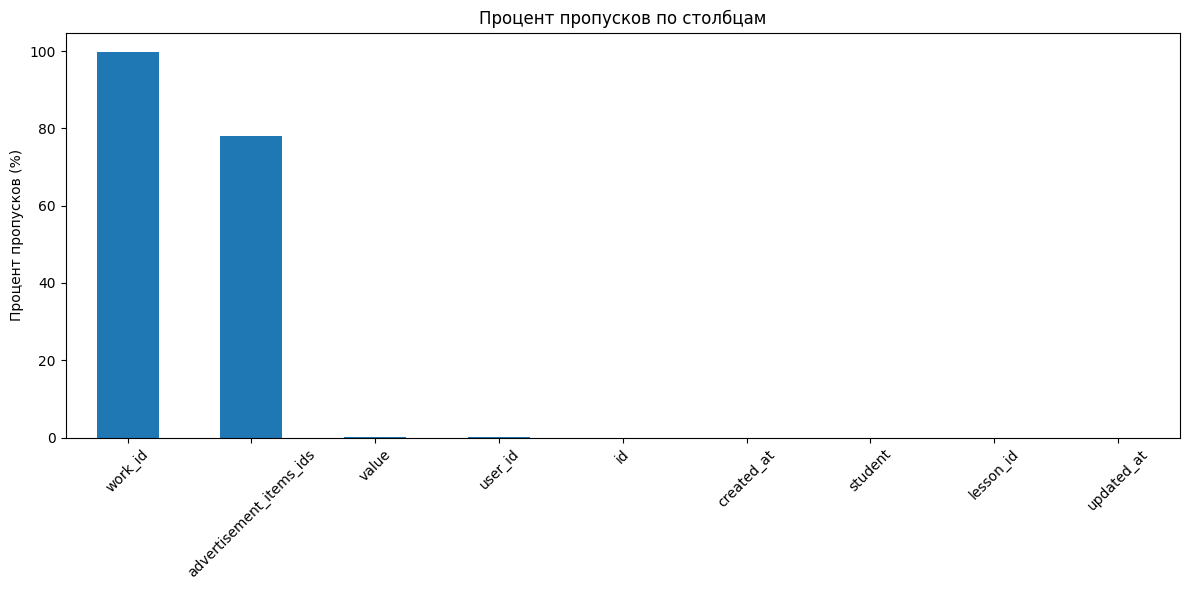


АНАЛИЗ СТРОК:
Строк без пропусков: 309
Строк с хотя бы одним пропуском: 1634877

Распределение пропусков по строкам:
  0 пропусков: 309 строк
  1 пропусков: 362970 строк
  2 пропусков: 1269515 строк
  3 пропусков: 2239 строк
  4 пропусков: 153 строк

ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:
Полностью пустых строк: 0
Полностью пустых столбцов: 0

Столбцов с >80% пропусков: 1
  work_id: 99.81%

АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:
Корреляции пропусков между столбцами (топ-5 пар):

ТИПЫ ДАННЫХ И ПРОПУСКИ:
Пропусков в числовых столбцах: 1634725
Пропусков в категориальных столбцах: 1274604

РЕКОМЕНДАЦИИ:
Общий процент пропусков: 19.77%
✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски

Столбцы-кандидаты на удаление (>80% пропусков):
  - work_id (99.8% пропусков)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

# 2. Анализ по столбцам
print("\n" + "=" * 50)
print("АНАЛИЗ ПО СТОЛБЦАМ:")
print("=" * 50)

missing_by_column = attendance.isnull().sum()
missing_percent_by_column = (missing_by_column / len(attendance)) * 100

missing_df = pd.DataFrame({
    'Пропуски': missing_by_column,
    'Процент': missing_percent_by_column.round(2),
    'Тип данных': attendance.dtypes
})

print(missing_df.sort_values('Пропуски', ascending=False))

# 3. Визуализация пропусков по столбцам
plt.figure(figsize=(12, 6))
missing_percent_by_column.sort_values(ascending=False).plot(kind='bar')
plt.title('Процент пропусков по столбцам')
plt.ylabel('Процент пропусков (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Анализ строк с пропусками
print("\n" + "=" * 50)
print("АНАЛИЗ СТРОК:")
print("=" * 50)

# Количество пропусков в каждой строке
missing_per_row = attendance.isnull().sum(axis=1)
print(f"Строк без пропусков: {(missing_per_row == 0).sum()}")
print(f"Строк с хотя бы одним пропуском: {(missing_per_row > 0).sum()}")

# Распределение количества пропусков по строкам
print("\nРаспределение пропусков по строкам:")
missing_counts = missing_per_row.value_counts().sort_index()
for count, num_rows in missing_counts.head(10).items():
    print(f"  {count} пропусков: {num_rows} строк")

# 5. Анализ полностью пустых строк и столбцов
print("\n" + "=" * 50)
print("ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:")
print("=" * 50)

# Полностью пустые строки
empty_rows = attendance.isnull().all(axis=1).sum()
print(f"Полностью пустых строк: {empty_rows}")

# Полностью пустые столбцы
empty_cols = attendance.isnull().all(axis=0).sum()
print(f"Полностью пустых столбцов: {empty_cols}")

# Столбцы с очень высоким процентом пропусков
high_missing_cols = missing_percent_by_column[missing_percent_by_column > 80]
print(f"\nСтолбцов с >80% пропусков: {len(high_missing_cols)}")
for col, percent in high_missing_cols.items():
    print(f"  {col}: {percent:.2f}%")

# 6. Паттерны пропусков
print("\n" + "=" * 50)
print("АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:")
print("=" * 50)

# Проверяем, есть ли столбцы, которые пропускаются вместе
# (это может указывать на связанные данные)

# Создаем бинарную матрицу пропусков
missing_matrix = attendance.isnull()

# Считаем корреляции пропусков между столбцами
missing_corr = missing_matrix.corr()

print("Корреляции пропусков между столбцами (топ-5 пар):")
# Находим пары столбцов с высокой корреляцией пропусков
corr_pairs = []
cols = missing_corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if abs(missing_corr.iloc[i, j]) > 0.3:  # порог корреляции
            corr_pairs.append((cols[i], cols[j], missing_corr.iloc[i, j]))

# Сортируем по абсолютному значению корреляции
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for col1, col2, corr in corr_pairs[:5]:
    print(f"  {col1} - {col2}: {corr:.3f}")

# 7. Анализ типов данных в столбцах с пропусками
print("\n" + "=" * 50)
print("ТИПЫ ДАННЫХ И ПРОПУСКИ:")
print("=" * 50)

numeric_missing = attendance.select_dtypes(include=[np.number]).isnull().sum().sum()
categorical_missing = attendance.select_dtypes(include=['object']).isnull().sum().sum()

print(f"Пропусков в числовых столбцах: {numeric_missing}")
print(f"Пропусков в категориальных столбцах: {categorical_missing}")

# 8. Рекомендации по обработке
print("\n" + "=" * 50)
print("РЕКОМЕНДАЦИИ:")
print("=" * 50)

total_cells = attendance.shape[0] * attendance.shape[1]
missing_percentage_total = (attendance.isnull().sum().sum() / total_cells) * 100

print(f"Общий процент пропусков: {missing_percentage_total:.2f}%")

if missing_percentage_total > 50:
    print("❌ ВЫСОКИЙ УРОВЕНЬ ПРОПУСКОВ - требуется тщательный анализ перед удалением")
    print("Рекомендации:")
    print("1. Проанализировать причины пропусков")
    print("2. Рассмотреть удаление столбцов с >80% пропусков")
    print("3. Для оставшихся - использовать интерполяцию/заполнение")
elif missing_percentage_total > 20:
    print("⚠️ СРЕДНИЙ УРОВЕНЬ ПРОПУСКОВ - требуется осторожная обработка")
    print("Рекомендации:")
    print("1. Удалить полностью пустые столбцы")
    print("2. Для частично заполненных - использовать умное заполнение")
else:
    print("✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски")

# Дополнительно: анализ конкретных проблемных столбцов
if not high_missing_cols.empty:
    print(f"\nСтолбцы-кандидаты на удаление (>80% пропусков):")
    for col in high_missing_cols.index:
        print(f"  - {col} ({high_missing_cols[col]:.1f}% пропусков)")

In [39]:
# Удаляем столбец work_id
if 'work_id' in attendance.columns:
    attendance = attendance.drop('work_id', axis=1)
    print(f"Столбец 'work_id' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'work_id' не найден в данных")
    # Удаляем столбец work_id
if 'advertisement_items_ids' in attendance.columns:
    attendance = attendance.drop('advertisement_items_ids', axis=1)
    print(f"Столбец 'advertisement_items_ids' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'advertisement_items_ids' не найден в данных")

Столбец 'work_id' не найден в данных
Столбец 'advertisement_items_ids' не найден в данных


In [40]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1635186, 7)
Всего ячеек: 11446302
Пропущенных значений: 2597
Процент пропусков: 0.02%


In [42]:
#Все пропуски value за 2024 год
rows_2024 = attendance[attendance['created_at'].str.contains('2024', na=False)]

print(f"Найдено строк с 2024 в created_at: {len(rows_2024)}")
print("\nПримеры строк:")
print(rows_2024.head())
print(rows_2024.isnull().sum())


Найдено строк с 2024 в created_at: 430020

Примеры строк:
    id  lesson_id  value  student                         created_at  \
0  501        551    1.0  2438882  2024-03-19 05:18:26.965851 +00:00   
1  506        551    1.0  2433670  2024-03-19 05:18:58.924558 +00:00   
2   99         42    1.0  2443930  2024-03-12 06:19:27.320665 +00:00   
3  511        551    NaN  2432303  2024-03-19 05:19:17.082448 +00:00   
4  516        551    1.0  2434755  2024-03-19 05:19:40.948376 +00:00   

                          updated_at  user_id  
0  2024-03-19 05:18:26.965905 +00:00      NaN  
1  2024-03-19 05:18:58.924627 +00:00      NaN  
2  2024-03-12 06:19:27.320716 +00:00      NaN  
3  2024-03-19 05:19:17.551402 +00:00      NaN  
4  2024-03-19 05:19:40.948425 +00:00      NaN  
id               0
lesson_id        0
value         1588
student          0
created_at       0
updated_at       0
user_id        970
dtype: int64


In [45]:
# Анализ уникальных значений в столбце 'value'
print("АНАЛИЗ СТОЛБЦА 'value':")
print("=" * 50)

# Проверяем, существует ли столбец
if 'value' not in attendance.columns:
    print("Столбец 'value' не найден в данных")
    print("Доступные столбцы:", attendance.columns.tolist())
else:
    # Основная информация о столбце
    print(f"Тип данных: {attendance['value'].dtype}")
    print(f"Всего значений: {len(attendance['value'])}")
    print(f"Уникальных значений: {attendance['value'].nunique()}")
    print(f"Пропущенных значений: {attendance['value'].isnull().sum()}")

    # Проверяем, является ли столбец числовым
    if pd.api.types.is_numeric_dtype(attendance['value']):
        print("\nСТАТИСТИКА ДЛЯ ЧИСЛОВОГО СТОЛБЦА:")
        print(f"Минимальное значение: {attendance['value'].min()}")
        print(f"Максимальное значение: {attendance['value'].max()}")
        print(f"Среднее значение: {attendance['value'].mean():.2f}")
        print(f"Медиана: {attendance['value'].median()}")
        print(f"Стандартное отклонение: {attendance['value'].std():.2f}")

        # Распределение значений
        print("\nРАСПРЕДЕЛЕНИЕ ЗНАЧЕНИЙ:")
        print(attendance['value'].value_counts().sort_index().head(10))

        # Если уникальных значений немного, покажем все
        if attendance['value'].nunique() <= 50:
            print("\nВСЕ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:")
            unique_values = attendance['value'].value_counts().sort_index()
            for value, count in unique_values.items():
                print(f"  {value}: {count} раз ({count/len(attendance)*100:.2f}%)")
        else:
            print(f"\nПЕРВЫЕ 20 УНИКАЛЬНЫХ ЗНАЧЕНИЙ (из {attendance['value'].nunique()}):")
            unique_values = attendance['value'].value_counts().sort_index().head(20)
            for value, count in unique_values.items():
                print(f"  {value}: {count} раз ({count/len(attendance)*100:.2f}%)")

            # Покажем также наиболее частые значения
            print(f"\n20 НАИБОЛЕЕ ЧАСТЫХ ЗНАЧЕНИЙ:")
            frequent_values = attendance['value'].value_counts().head(20)
            for value, count in frequent_values.items():
                print(f"  {value}: {count} раз ({count/len(attendance)*100:.2f}%)")

    else:
        # Для нечисловых данных
        print("\nСТАТИСТИКА ДЛЯ КАТЕГОРИАЛЬНОГО СТОЛБЦА:")

        # Если уникальных значений немного, покажем все
        if attendance['value'].nunique() <= 50:
            print("ВСЕ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:")
            unique_values = attendance['value'].value_counts()
            for value, count in unique_values.items():
                print(f"  '{value}': {count} раз ({count/len(attendance)*100:.2f}%)")
        else:
            print(f"ПЕРВЫЕ 30 УНИКАЛЬНЫХ ЗНАЧЕНИЙ (из {attendance['value'].nunique()}):")
            unique_values = attendance['value'].value_counts().head(30)
            for value, count in unique_values.items():
                print(f"  '{value}': {count} раз ({count/len(attendance)*100:.2f}%)")

    # Дополнительно: примеры значений
    print("\nПРИМЕРЫ ЗНАЧЕНИЙ ИЗ СТОЛБЦА:")
    sample_values = attendance['value'].dropna().sample(min(10, len(attendance)), random_state=42)
    for i, value in enumerate(sample_values):
        print(f"  Пример {i+1}: {value}")

АНАЛИЗ СТОЛБЦА 'value':
Тип данных: float64
Всего значений: 1635186
Уникальных значений: 6
Пропущенных значений: 1588

СТАТИСТИКА ДЛЯ ЧИСЛОВОГО СТОЛБЦА:
Минимальное значение: 0.0
Максимальное значение: 5.0
Среднее значение: 1.00
Медиана: 1.0
Стандартное отклонение: 0.32

РАСПРЕДЕЛЕНИЕ ЗНАЧЕНИЙ:
value
0.0      33576
1.0    1589833
2.0        566
3.0        666
4.0       1886
5.0       7071
Name: count, dtype: int64

ВСЕ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:
  0.0: 33576 раз (2.05%)
  1.0: 1589833 раз (97.23%)
  2.0: 566 раз (0.03%)
  3.0: 666 раз (0.04%)
  4.0: 1886 раз (0.12%)
  5.0: 7071 раз (0.43%)

ПРИМЕРЫ ЗНАЧЕНИЙ ИЗ СТОЛБЦА:
  Пример 1: 1.0
  Пример 2: 1.0
  Пример 3: 1.0
  Пример 4: 1.0
  Пример 5: 1.0
  Пример 6: 1.0
  Пример 7: 1.0
  Пример 8: 5.0
  Пример 9: 1.0
  Пример 10: 1.0


In [46]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id
0,501,551,1.0,2438882,2024-03-19 05:18:26.965851 +00:00,2024-03-19 05:18:26.965905 +00:00,NaN
1,506,551,1.0,2433670,2024-03-19 05:18:58.924558 +00:00,2024-03-19 05:18:58.924627 +00:00,NaN
2,99,42,1.0,2443930,2024-03-12 06:19:27.320665 +00:00,2024-03-12 06:19:27.320716 +00:00,NaN
3,511,551,NaN,2432303,2024-03-19 05:19:17.082448 +00:00,2024-03-19 05:19:17.551402 +00:00,NaN
4,516,551,1.0,2434755,2024-03-19 05:19:40.948376 +00:00,2024-03-19 05:19:40.948425 +00:00,NaN
...,...,...,...,...,...,...,...
1635181,1637359,200547,1.0,2479662,2025-10-17 01:26:50.819799 +00:00,2025-10-17 01:26:50.819820 +00:00,7329.0
1635182,1637360,200547,1.0,2486597,2025-10-17 01:26:57.444616 +00:00,2025-10-17 01:26:57.444637 +00:00,7329.0
1635183,1637361,200547,1.0,2477539,2025-10-17 01:27:06.516953 +00:00,2025-10-17 01:27:06.516974 +00:00,7329.0
1635184,1637362,200547,1.0,2484605,2025-10-17 01:27:17.018094 +00:00,2025-10-17 01:27:17.018115 +00:00,7329.0
